In [1]:
import colorstamps
import matplotlib.pyplot as plt
import numpy as np



# Colormaps in sets of three 
This notebook generates colormaps that are in sets of three

The colormaps are generated from the ‘CAM02-LCD’ colorspace as defined in the package colorspacious (https://pypi.org/project/colorspacious/)

https://github.com/trygvrad/colorstamps/ is used for easy access to this colorspace and visualization

In practice, we are are looking for three vectors at 120° angles in the following colorspace:

In [2]:
colorbar_dict = {}

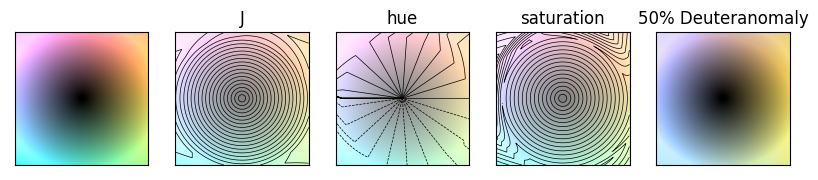

In [3]:
cmap = colorstamps.stamps.get_var_J(l = 512, J = (110,0))
stamp = colorstamps.Stamp(cmap)
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
stamp.eval(axes)

We need to find three vectors at 120° each in this colorspace 

Once we have selected three vectors, we need to make sure they form a greyscale (r=g=b) when they are combinde linearly

Since the vectors are defined at 120° in ‘CAM02-LCD’ colorspace this is not guaranteed when they are added together in RGB colorspace, and we apply a correction for this

We also need to adjust the colormaps so that they start at (0,0,0) and end at (1,1,1) when combined

We then extract the final colormaps from the 3D matrix

# Colorbars 3VarAddA

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


max before adjustment: [0.92826904 1.0183957  1.04306872]
max after adjustment: [0.99657782 0.99657782 0.99657782]
values <0: 9344
values >1: 98061
check for change in the first 3 values of the first: 
 [[0.         0.         0.        ]
 [0.02470015 0.03587908 0.04655344]
 [0.09803451 0.12590589 0.15341447]]
check for change in the first 3 values of the second:
 [[0.         0.         0.        ]
 [0.02641019 0.03792788 0.02056392]
 [0.10286903 0.13089837 0.08760282]]
check for change in the first 3 values of the second:
 [[0.         0.         0.        ]
 [0.04997501 0.02727839 0.033968  ]
 [0.16066735 0.10476664 0.12055361]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

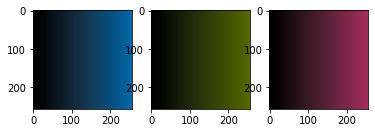

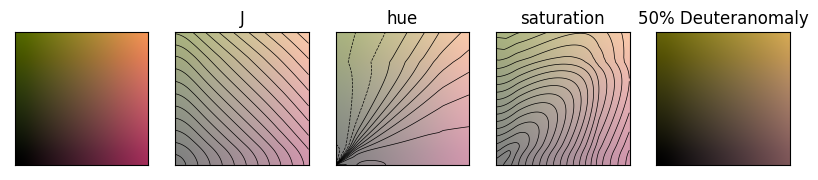

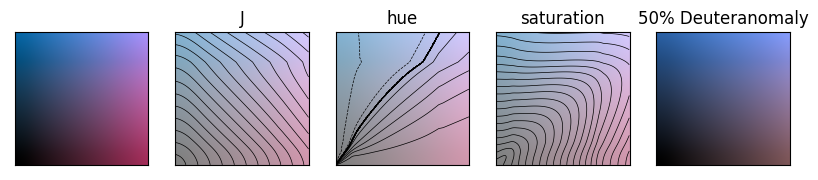

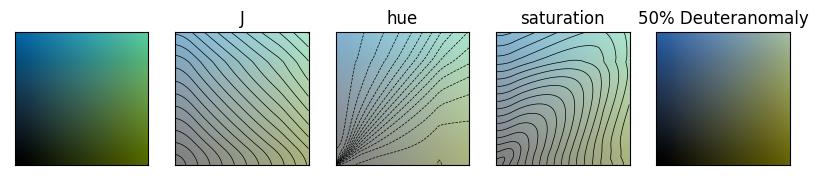

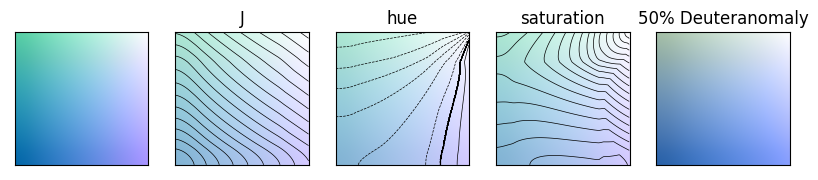

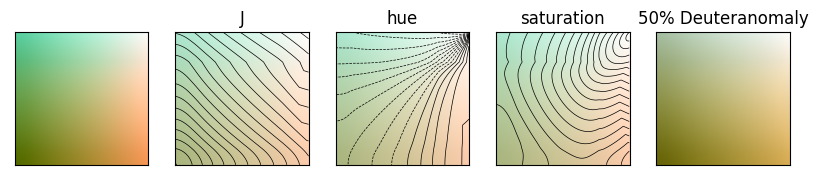

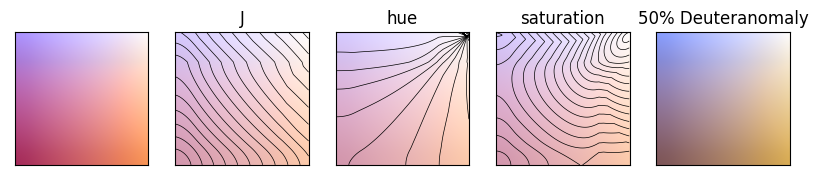

In [4]:
r = 30 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (55.7, 0.75) # range in lightness 
radius = 37
cmap_0 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r, r = radius)[256,:256] 
cmap_1 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r+120, r = radius)[256,:256]
cmap_2 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r+240, r = radius)[256,:256]

print(f'max before adjustment: {cmap_0[0] + cmap_1[0] + cmap_2[0]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(256):
    factor = 1#i/255 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3
        
print(f'max after adjustment: {cmap_0[0] + cmap_1[0] + cmap_2[0]}')

cmap_0 -= cmap_0[-1,:]
cmap_1 -= cmap_1[-1,:]
cmap_2 -= cmap_2[-1,:]
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0[::-1]*np.ones((256,256,3)))
axes[1].imshow(cmap_1[::-1]*np.ones((256,256,3)))
axes[2].imshow(cmap_2[::-1]*np.ones((256,256,3)))

# combine to a 2d color matrix
cmap = cmap_0[::-1,np.newaxis,np.newaxis] + cmap_1[np.newaxis,::-1,np.newaxis] + cmap_2[np.newaxis,np.newaxis,::-1]

# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
cmap = cmap/cmap[255,255, 255][np.newaxis,np.newaxis,np.newaxis,:]

# ensure origin is rgb = (0,0,0)
cmap[0,0,0,:] = 0

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[255,255]*255, cmap[0,0]*255)


# select cbars
colorbar_dict['3VarAddA0'] = cmap[:,0,0]
colorbar_dict['3VarAddA1'] = cmap[0,:,0]
colorbar_dict['3VarAddA2'] = cmap[0,0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['3VarAddA0'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarAddA1'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarAddA2'][0:3]*255))


# evaluate
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[0,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,0,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,0] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[-1,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,-1,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,-1] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error

# Colorbars 3VarAddB

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


max before adjustment: [1.013153   0.95369065 1.02622674]
max after adjustment: [0.99769013 0.99769013 0.99769013]
values <0: 8425
values >1: 24436
check for change in the first 3 values of the first: 
 [[0.         0.         0.        ]
 [0.01249387 0.03183726 0.02969603]
 [0.07168813 0.12070363 0.11466769]]
check for change in the first 3 values of the second:
 [[0.         0.         0.        ]
 [0.03843307 0.02376799 0.00969423]
 [0.1366379  0.10033581 0.06628462]]
check for change in the first 3 values of the second:
 [[0.         0.         0.        ]
 [0.02893318 0.02425486 0.04046985]
 [0.11400675 0.10129333 0.14138047]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

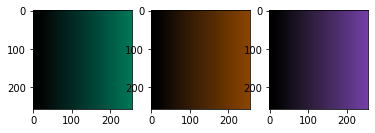

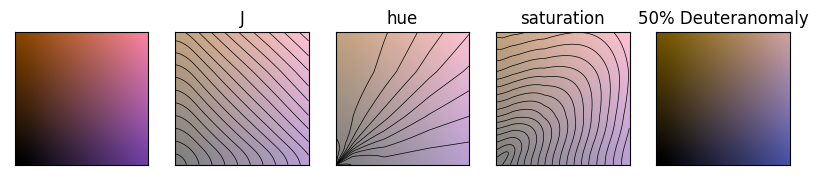

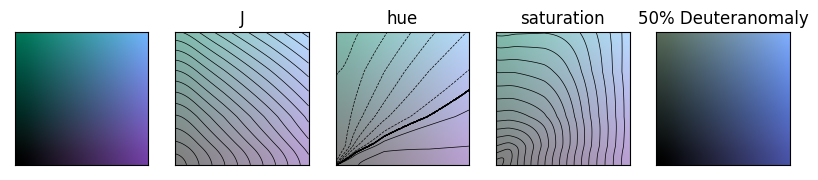

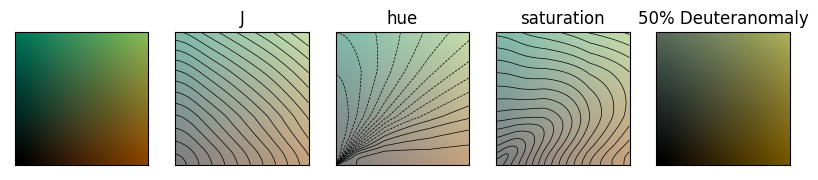

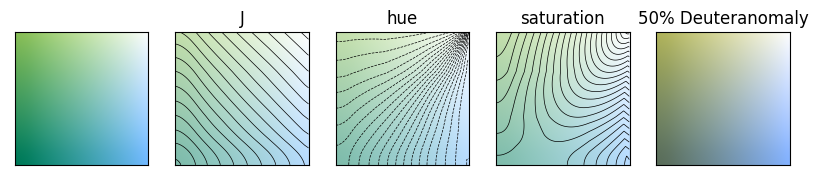

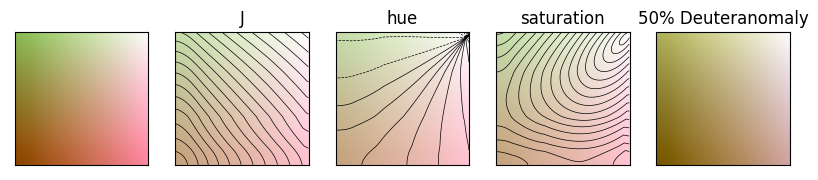

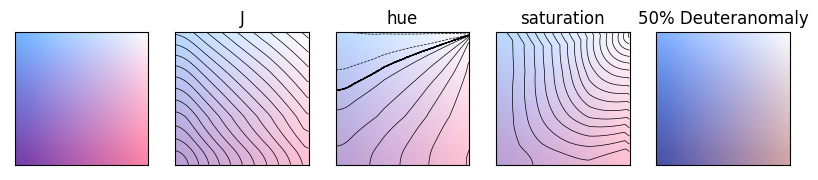

In [5]:
r = -30+120 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (52.8, 0.75) # range in lightness 

radius = 37
cmap_0 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r, r = radius)[256,:256] 
cmap_1 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r+120, r = radius)[256,:256]
cmap_2 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r+240, r = radius)[256,:256]

print(f'max before adjustment: {cmap_0[0] + cmap_1[0] + cmap_2[0]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(256):
    factor = 1#i/255 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3
        
print(f'max after adjustment: {cmap_0[0] + cmap_1[0] + cmap_2[0]}')

cmap_0 -= cmap_0[-1,:]
cmap_1 -= cmap_1[-1,:]
cmap_2 -= cmap_2[-1,:]
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0[::-1]*np.ones((256,256,3)))
axes[1].imshow(cmap_1[::-1]*np.ones((256,256,3)))
axes[2].imshow(cmap_2[::-1]*np.ones((256,256,3)))

# combine to a 2d color matrix
cmap = cmap_0[::-1,np.newaxis,np.newaxis] + cmap_1[np.newaxis,::-1,np.newaxis] + cmap_2[np.newaxis,np.newaxis,::-1]

# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
cmap = cmap/cmap[255,255, 255][np.newaxis,np.newaxis,np.newaxis,:]

# ensure origin is rgb = (0,0,0)
cmap[0,0,0,:] = 0

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[255,255]*255, cmap[0,0]*255)


# select cbars
colorbar_dict['3VarAddB0'] = cmap[:,0,0]
colorbar_dict['3VarAddB1'] = cmap[0,:,0]
colorbar_dict['3VarAddB2'] = cmap[0,0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['3VarAddB0'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarAddB1'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarAddB2'][0:3]*255))


# evaluate
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[0,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,0,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,0] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[-1,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,-1,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,-1] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error

# Colorbars 3VarAddC

max before adjustment: [1.43755558 1.49973976 1.47968057]
max after adjustment: [1.47232531 1.47232531 1.47232531]
values <0: 0
values >1: 10459434
check for change in the first 3 values of the first: 
 [[0.         0.         0.        ]
 [0.0783188  0.09100961 0.1040873 ]
 [0.19821376 0.23107717 0.26481824]]
check for change in the first 3 values of the second:
 [[0.         0.         0.        ]
 [0.07943592 0.09375999 0.07362037]
 [0.2027366  0.23756961 0.1858512 ]]
check for change in the first 3 values of the second:
 [[0.         0.         0.        ]
 [0.10803742 0.08102254 0.08808447]
 [0.27351598 0.20581956 0.2237969 ]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

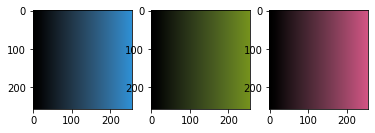

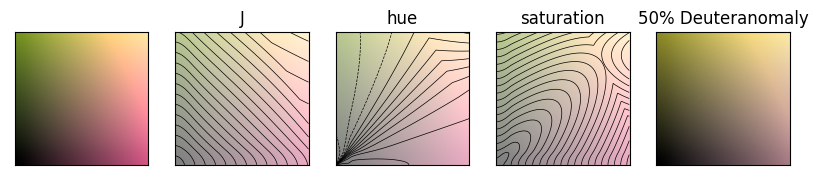

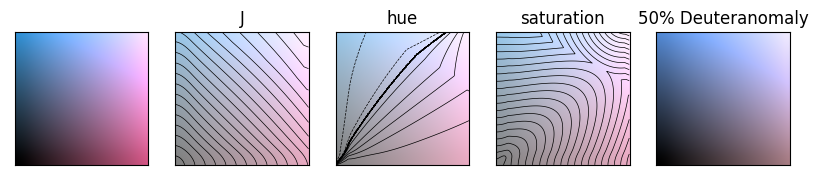

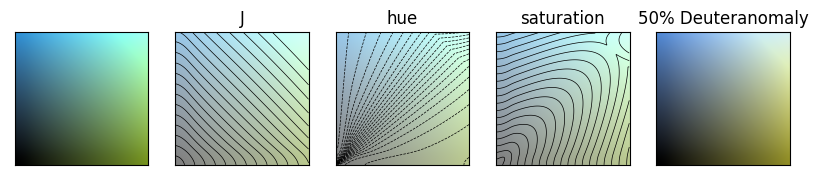

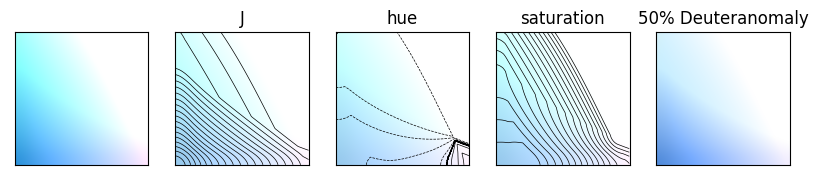

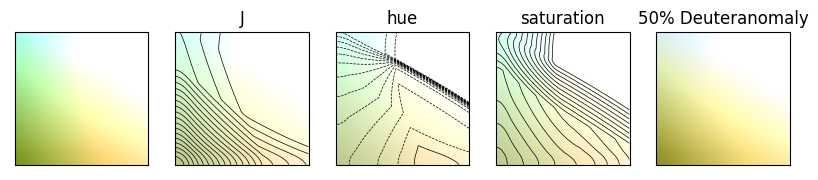

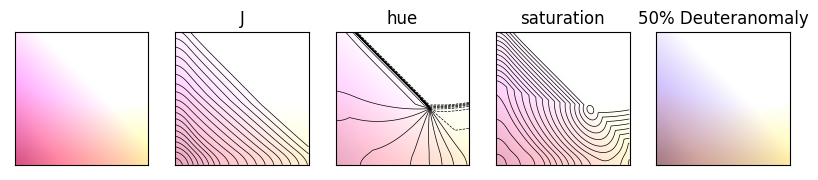

In [6]:
r = 30 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (77, 0.75) # range in lightness 
radius = 37

cmap_0 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r, r = radius)[256,:256] 
cmap_1 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r+120, r = radius)[256,:256]
cmap_2 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r+240, r = radius)[256,:256]

print(f'max before adjustment: {cmap_0[0] + cmap_1[0] + cmap_2[0]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(256):
    factor = 1#i/255 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3
        
print(f'max after adjustment: {cmap_0[0] + cmap_1[0] + cmap_2[0]}')

cmap_0 -= cmap_0[-1,:]
cmap_1 -= cmap_1[-1,:]
cmap_2 -= cmap_2[-1,:]
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0[::-1]*np.ones((256,256,3)))
axes[1].imshow(cmap_1[::-1]*np.ones((256,256,3)))
axes[2].imshow(cmap_2[::-1]*np.ones((256,256,3)))
# combine to a 2d color matrix
cmap = cmap_0[::-1,np.newaxis,np.newaxis] + cmap_1[np.newaxis,::-1,np.newaxis] + cmap_2[np.newaxis,np.newaxis,::-1]

# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
cmap = cmap *3/2/ cmap[255,255, 255][np.newaxis,np.newaxis,np.newaxis,:]

# ensure origin is rgb = (0,0,0)
cmap[0,0,0,:] = 0

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[255,255]*255, cmap[0,0]*255)


# select cbars
colorbar_dict['3VarAddC0'] = cmap[:,0,0]
colorbar_dict['3VarAddC1'] = cmap[0,:,0]
colorbar_dict['3VarAddC2'] = cmap[0,0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['3VarAddC0'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarAddC1'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarAddC2'][0:3]*255))


# evaluate
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[0,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,0,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,0] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[-1,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,-1,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,-1] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error

# Colorbars 3VarAddD

max before adjustment: [1.41049001 1.49911173 1.47016854]
max after adjustment: [1.45992343 1.45992343 1.45992343]
values <0: 0
values >1: 10104350
check for change in the first 3 values of the first: 
 [[0.         0.         0.        ]
 [0.07194393 0.09549029 0.09364939]
 [0.18189895 0.24293508 0.23667883]]
check for change in tColorbarshe first 3 values of the second:
 [[0.         0.         0.        ]
 [0.10281258 0.08605896 0.06818347]
 [0.26184863 0.21813704 0.17440775]]
check for change in the first 3 values of the second:
 [[0.         0.         0.        ]
 [0.09282047 0.08602773 0.10574413]
 [0.23578116 0.21845663 0.26844216]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

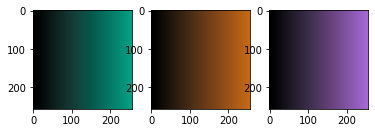

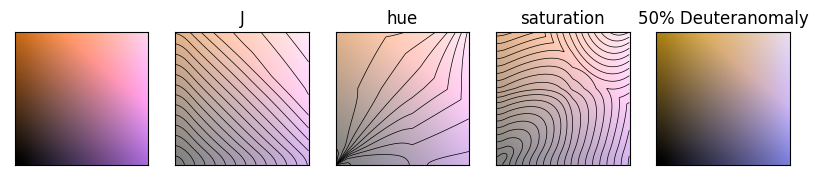

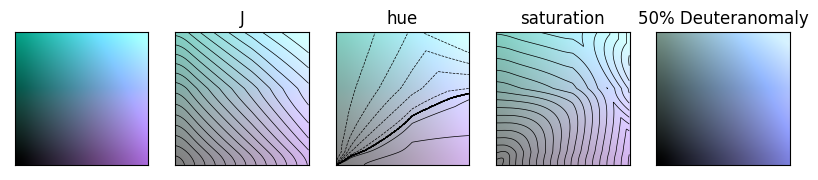

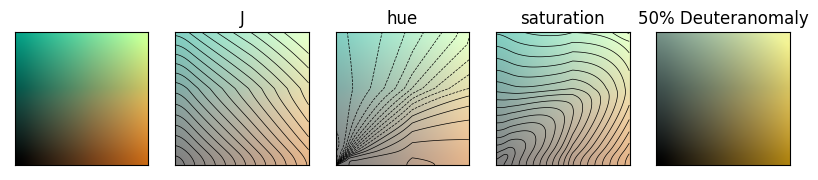

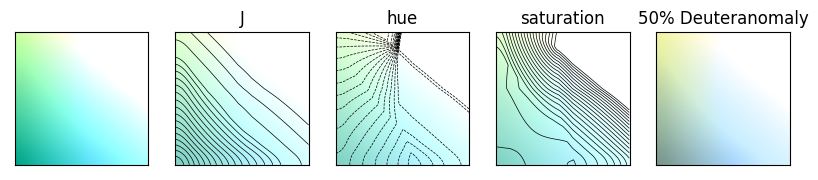

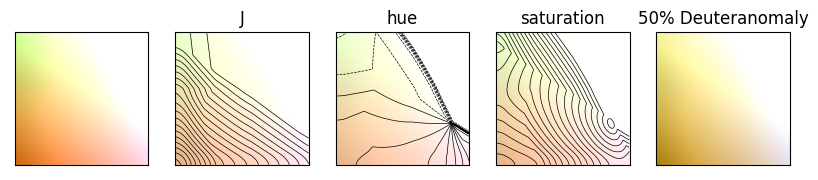

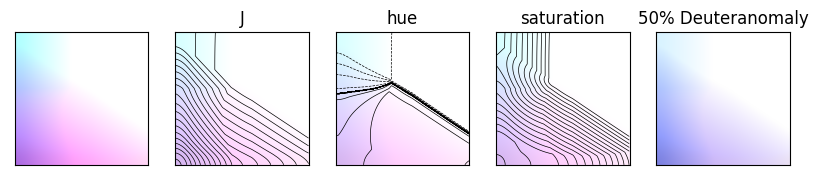

In [7]:
r = -30+120 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (77, 0.75) # range in lightness 
radius = 37

cmap_0 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r, r = radius)[256,:256] 
cmap_1 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r+120, r = radius)[256,:256]
cmap_2 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r+240, r = radius)[256,:256]

print(f'max before adjustment: {cmap_0[0] + cmap_1[0] + cmap_2[0]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(256):
    factor = 1#i/255 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3
        
print(f'max after adjustment: {cmap_0[0] + cmap_1[0] + cmap_2[0]}')

cmap_0 -= cmap_0[-1,:]
cmap_1 -= cmap_1[-1,:]
cmap_2 -= cmap_2[-1,:]
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0[::-1]*np.ones((256,256,3)))
axes[1].imshow(cmap_1[::-1]*np.ones((256,256,3)))
axes[2].imshow(cmap_2[::-1]*np.ones((256,256,3)))

# combine to a 2d color matrix
cmap = cmap_0[::-1,np.newaxis,np.newaxis] + cmap_1[np.newaxis,::-1,np.newaxis] + cmap_2[np.newaxis,np.newaxis,::-1]

# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
cmap = cmap *3/2/ cmap[255,255, 255][np.newaxis,np.newaxis,np.newaxis,:]

# ensure origin is rgb = (0,0,0)
cmap[0,0,0,:] = 0

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[255,255]*255, cmap[0,0]*255)


# select cbars
colorbar_dict['3VarAddD0'] = cmap[:,0,0]
colorbar_dict['3VarAddD1'] = cmap[0,:,0]
colorbar_dict['3VarAddD2'] = cmap[0,0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['3VarAddD0'][0:3]*255))
print('check for change in tColorbarshe first 3 values of the second:\n', (colorbar_dict['3VarAddD1'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarAddD2'][0:3]*255))


# evaluate
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[0,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,0,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,0] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[-1,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,-1,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,-1] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error

# 3VarSubA

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


max before adjustment: [ 0.0044512   0.02569272 -0.02485473]
min before adjustment: [0.97983385 0.92516759 0.9147569 ]
max after adjustment: [0.00176306 0.00176306 0.00176306]
min after adjustment: [0.93991945 0.93991945 0.93991945]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


values <0: 0
values >1: 18290
check for change in the first 3 values of the first: 
 [[255.         255.         255.        ]
 [254.59469668 254.76614113 254.9200002 ]
 [254.1450611  254.50531324 254.83381502]]
check for change in the first 3 values of the second:
 [[255.         255.         255.        ]
 [254.62841786 254.79379998 254.52411866]
 [254.22825862 254.55972423 253.98986515]]
check for change in the first 3 values of the second:
 [[255.         255.         255.        ]
 [254.96976848 254.63294192 254.74876417]
 [254.92183487 254.23011713 254.47147442]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

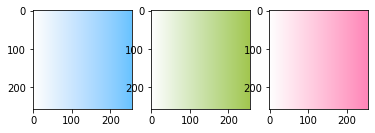

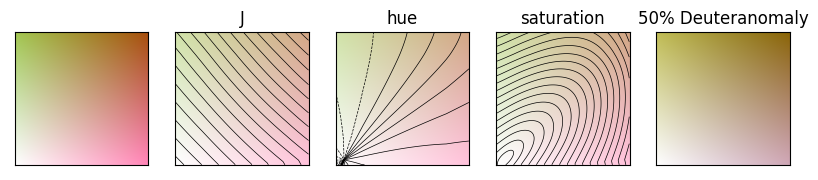

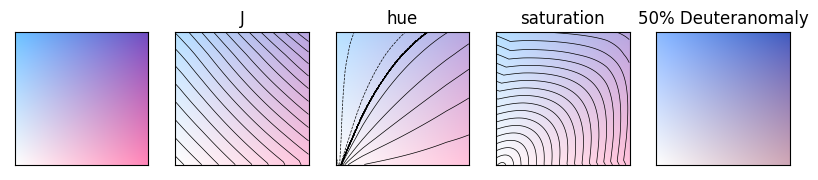

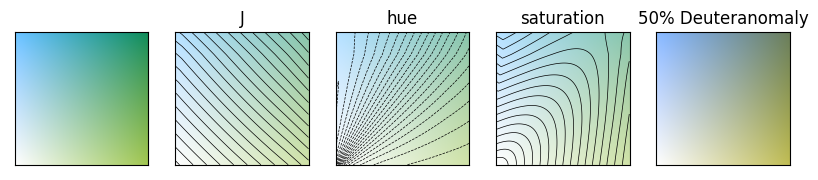

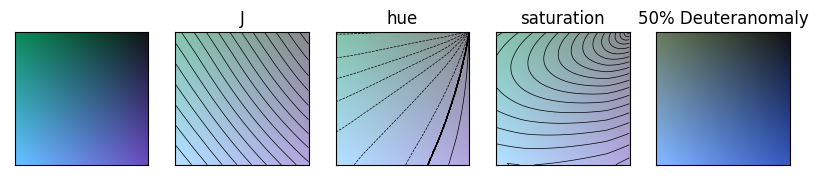

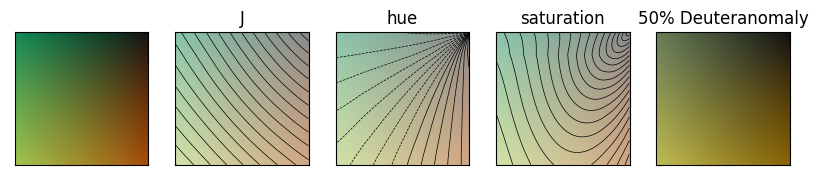

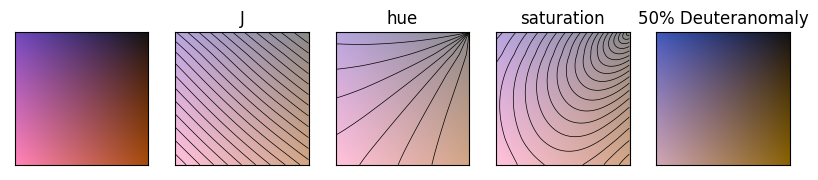

In [8]:
r = 30 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (98.6, 128) # range in lightness 
radius = 37

cmap_0 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r, r = radius)[256,:256] 
cmap_1 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r+120, r = radius)[256,:256]
cmap_2 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r+240, r = radius)[256,:256]

print(f'max before adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')
print(f'min before adjustment: {-2 + cmap_0[-1] + cmap_1[-1] + cmap_2[-1]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(256):
    factor = 1#i/255 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3
        
print(f'max after adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')
print(f'min after adjustment: {-2 + cmap_0[-1] + cmap_1[-1] + cmap_2[-1]}')

cmap_0 += 1-cmap_0[-1,:][np.newaxis,:]
cmap_1 += 1-cmap_1[-1,:][np.newaxis,:]
cmap_2 += 1-cmap_2[-1,:][np.newaxis,:]
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0[::-1]*np.ones((256,256,3)))
axes[1].imshow(cmap_1[::-1]*np.ones((256,256,3)))
axes[2].imshow(cmap_2[::-1]*np.ones((256,256,3)))

# combine to a 2d color matrix
cmap = 1 \
    -(1-cmap_0[::-1,np.newaxis,np.newaxis]) \
    -(1- cmap_1[np.newaxis,::-1,np.newaxis]) \
    -(1-cmap_2[np.newaxis,np.newaxis,::-1])

# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
cmap = cmap/cmap[0,0, 0][np.newaxis,np.newaxis,np.newaxis,:]

# ensure origin is rgb = (0,0,0)
#cmap[0,0,0,:] = 0

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[255,255]*255, cmap[0,0]*255)


# select cbars
colorbar_dict['3VarSubA0'] = cmap[:,0,0]
colorbar_dict['3VarSubA1'] = cmap[0,:,0]
colorbar_dict['3VarSubA2'] = cmap[0,0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['3VarSubA0'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubA1'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubA2'][0:3]*255))


# evaluate
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[0,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,0,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,0] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[-1,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,-1,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,-1] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error

# 3VarSubB

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


max before adjustment: [-0.14164883  0.13857788  0.0142248 ]
min before adjustment: [0.98015824 0.92556776 0.91513894]
max after adjustment: [0.00371795 0.00371795 0.00371795]
min after adjustment: [0.94028831 0.94028831 0.94028831]
values <0: 349056
values >1: 93996
check for change in the first 3 values of the first: 
 [[255.         255.         255.        ]
 [254.55557838 254.84770509 254.81753276]
 [254.06109358 254.68165603 254.60843945]]
check for change in the first 3 values of the second:
 [[255.         255.         255.        ]
 [254.95201806 254.72172512 254.49633524]
 [254.9004416  254.41204581 253.95570272]]
check for change in the first 3 values of the second:
 [[255.         255.         255.        ]
 [254.79529665 254.73346288 254.98902508]
 [254.57127133 254.43910467 254.96866434]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

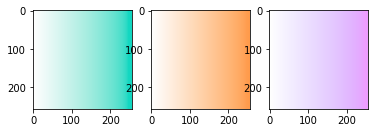

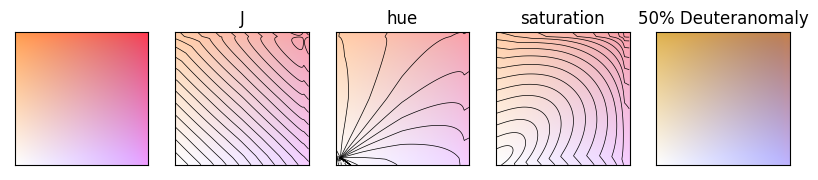

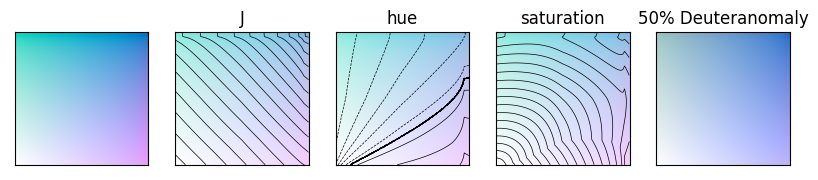

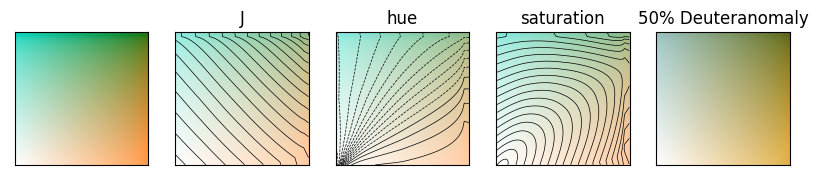

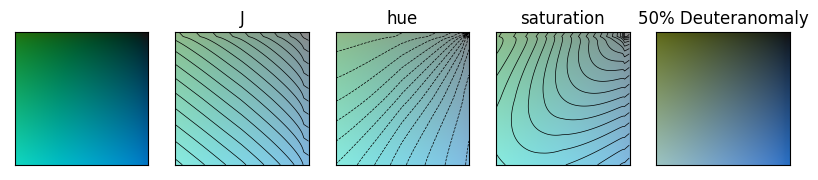

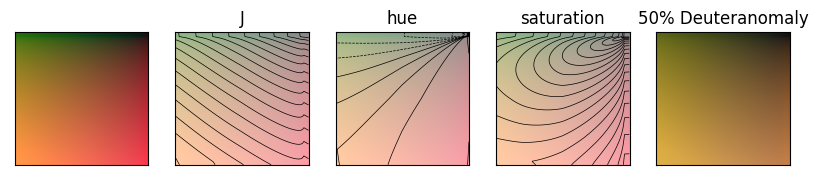

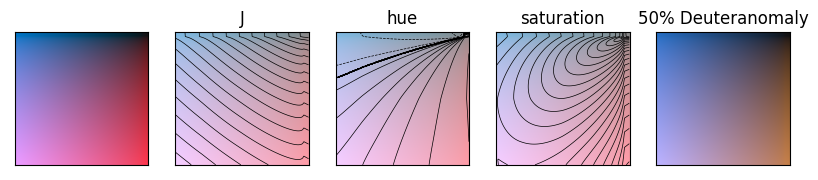

In [9]:
r = -30+120 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (103, 128) # range in lightness 
radius = 37

cmap_0 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r, r = radius)[256,:256] 
cmap_1 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r+120, r = radius)[256,:256]
cmap_2 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r+240, r = radius)[256,:256]

print(f'max before adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')
print(f'min before adjustment: {-2 + cmap_0[-1] + cmap_1[-1] + cmap_2[-1]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(256):
    factor = 1#i/255 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3
        
print(f'max after adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')
print(f'min after adjustment: {-2 + cmap_0[-1] + cmap_1[-1] + cmap_2[-1]}')

cmap_0 += 1-cmap_0[-1,:][np.newaxis,:]
cmap_1 += 1-cmap_1[-1,:][np.newaxis,:]
cmap_2 += 1-cmap_2[-1,:][np.newaxis,:]
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0[::-1]*np.ones((256,256,3)))
axes[1].imshow(cmap_1[::-1]*np.ones((256,256,3)))
axes[2].imshow(cmap_2[::-1]*np.ones((256,256,3)))

# combine to a 2d color matrix
cmap = 1 \
    -(1-cmap_0[::-1,np.newaxis,np.newaxis]) \
    -(1- cmap_1[np.newaxis,::-1,np.newaxis]) \
    -(1-cmap_2[np.newaxis,np.newaxis,::-1])

# ensure origin is rgb = (0,0,0)
#cmap[0,0,0,:] = 0

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[255,255]*255, cmap[0,0]*255)


# select cbars
colorbar_dict['3VarSubB0'] = cmap[:,0,0]
colorbar_dict['3VarSubB1'] = cmap[0,:,0]
colorbar_dict['3VarSubB2'] = cmap[0,0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['3VarSubB0'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubB1'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubB2'][0:3]*255))


# evaluate
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[0,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,0,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,0] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[-1,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,-1,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,-1] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error

# 3VarSubC

max before adjustment: [-0.54525401 -0.4863101  -0.50600583]
min before adjustment: [0.97800353 0.92336899 0.91296429]
max after adjustment: [-0.51252331 -0.51252331 -0.51252331]
min after adjustment: [0.93811227 0.93811227 0.93811227]
values <0: 8629275
values >1: 0
check for change in the first 3 values of the first: 
 [[255.         255.         255.        ]
 [254.40524041 254.57662116 254.73039417]
 [253.7462318  254.10626974 254.43451542]]
check for change in the first 3 values of the second:
 [[255.         255.         255.        ]
 [254.43897256 254.60425725 254.33468834]
 [253.82942986 254.16062186 253.59112732]]
check for change in the first 3 values of the second:
 [[255.         255.         255.        ]
 [254.7801432  254.44347777 254.55927367]
 [254.52248047 253.83125053 254.07249939]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

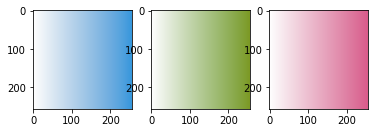

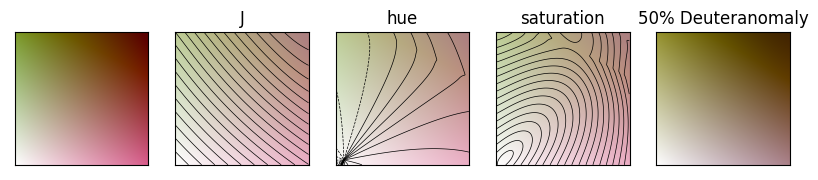

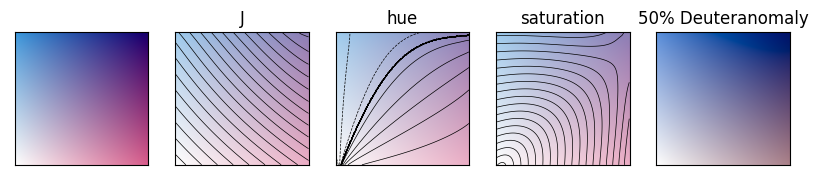

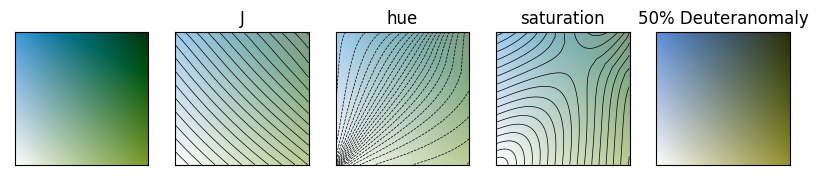

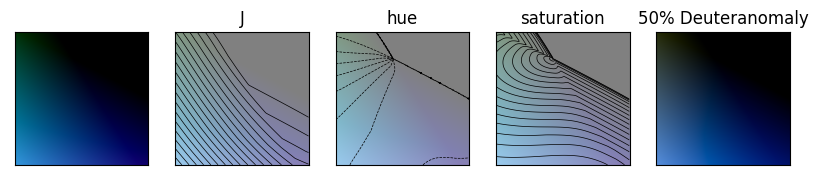

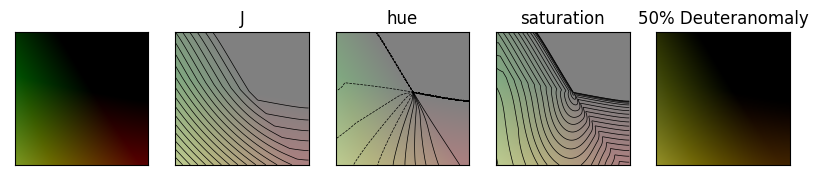

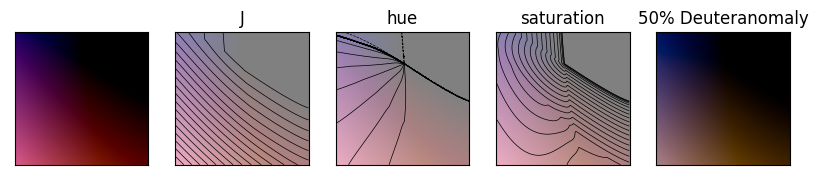

In [10]:
r = 30 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (77.6, 128) # range in lightness  
radius = 37

cmap_0 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r, r = radius)[256,:256] 
cmap_1 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r+120, r = radius)[256,:256]
cmap_2 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r+240, r = radius)[256,:256]

print(f'max before adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')
print(f'min before adjustment: {-2 + cmap_0[-1] + cmap_1[-1] + cmap_2[-1]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(256):
    factor = 1#i/255 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3
        
print(f'max after adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')
print(f'min after adjustment: {-2 + cmap_0[-1] + cmap_1[-1] + cmap_2[-1]}')

cmap_0 += 1-cmap_0[-1,:][np.newaxis,:]
cmap_1 += 1-cmap_1[-1,:][np.newaxis,:]
cmap_2 += 1-cmap_2[-1,:][np.newaxis,:]
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0[::-1]*np.ones((256,256,3)))
axes[1].imshow(cmap_1[::-1]*np.ones((256,256,3)))
axes[2].imshow(cmap_2[::-1]*np.ones((256,256,3)))


# combine to a 2d color matrix
cmap = 1 \
    -(1-cmap_0[::-1,np.newaxis,np.newaxis]) \
    -(1- cmap_1[np.newaxis,::-1,np.newaxis]) \
    -(1-cmap_2[np.newaxis,np.newaxis,::-1])

# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
cmap = cmap/cmap[0,0, 0][np.newaxis,np.newaxis,np.newaxis,:]

# ensure origin is rgb = (0,0,0)
#cmap[0,0,0,:] = 0

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[255,255]*255, cmap[0,0]*255)


# select cbars
colorbar_dict['3VarSubC0'] = cmap[:,0,0]
colorbar_dict['3VarSubC1'] = cmap[0,:,0]
colorbar_dict['3VarSubC2'] = cmap[0,0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['3VarSubC0'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubC1'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubC2'][0:3]*255))


# evaluate
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[0,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,0,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,0] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[-1,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,-1,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,-1] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error

# 3VarSubD

max before adjustment: [-0.57929212 -0.48695413 -0.51525817]
min before adjustment: [0.97794433 0.9233922  0.91297063]
max after adjustment: [-0.52716814 -0.52716814 -0.52716814]
min after adjustment: [0.93810239 0.93810239 0.93810239]
values <0: 10652178
values >1: 0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


check for change in the first 3 values of the first: 
 [[255.         255.         255.        ]
 [254.32644849 254.61841322 254.5882361 ]
 [253.57876078 254.19881285 254.12560987]]
check for change in the first 3 values of the second:
 [[255.         255.         255.        ]
 [254.72269037 254.49249124 254.26724573]
 [254.41746404 253.92939921 253.47347541]]
check for change in the first 3 values of the second:
 [[255.         255.         255.        ]
 [254.56600742 254.50424181 254.75966444]
 [254.08846397 253.95647673 254.48560352]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


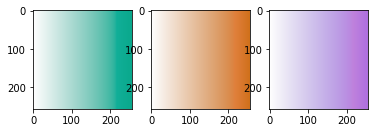

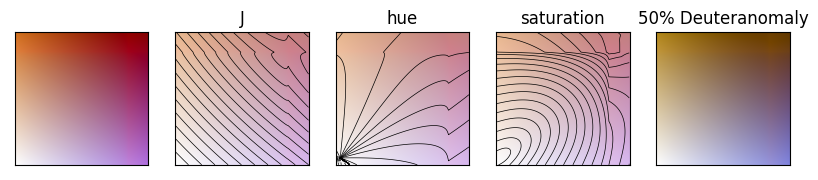

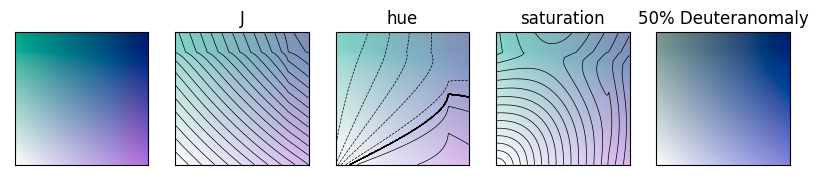

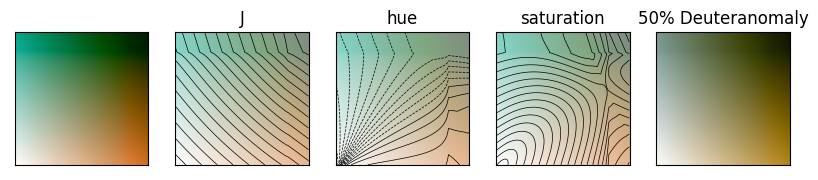

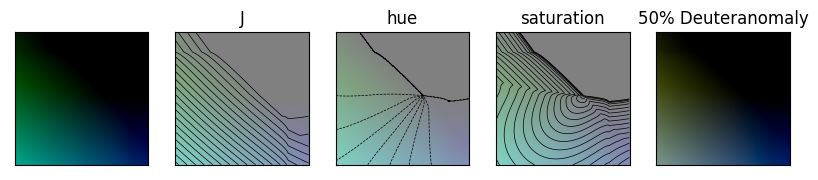

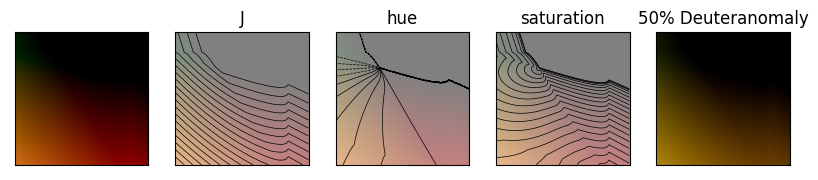

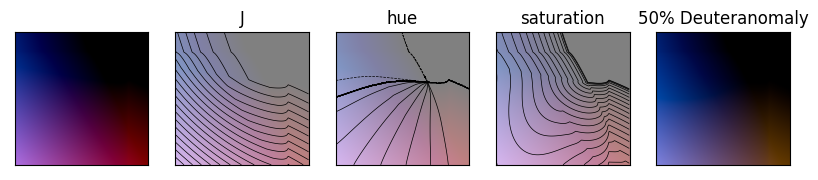

In [11]:
r = -30+120 # rotation of the colorspace
# the range in lightness is adjust so that both colorbars increment at the first level, and they reach a maximum of rgb = (1,1,1) when combined
J = (77.6, 128) # range in lightness  
radius = 37

cmap_0 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r, r = radius)[256,:256] 
cmap_1 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r+120, r = radius)[256,:256]
cmap_2 = colorstamps.stamps.get_var_J(l = 512, J = J, rot = r+240, r = radius)[256,:256]

print(f'max before adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')
print(f'min before adjustment: {-2 + cmap_0[-1] + cmap_1[-1] + cmap_2[-1]}')
# adjust greyscale by slightly shifting both colorbars
for i in range(256):
    factor = 1#i/255 #scale the correction with distance from origin, no need to adjust low values
    k = np.sum(cmap_0[i] + cmap_1[i] + cmap_2[i])/3
    for j in range(3):
        d = k - (cmap_0[i,j] + cmap_1[i,j] + cmap_2[i,j])
        cmap_0[i,j] += factor*d/3
        cmap_1[i,j] += factor*d/3
        cmap_2[i,j] += factor*d/3
        
print(f'max after adjustment: {-2 + cmap_0[0] + cmap_1[0] + cmap_2[0]}')
print(f'min after adjustment: {-2 + cmap_0[-1] + cmap_1[-1] + cmap_2[-1]}')

cmap_0 += 1-cmap_0[-1,:][np.newaxis,:]
cmap_1 += 1-cmap_1[-1,:][np.newaxis,:]
cmap_2 += 1-cmap_2[-1,:][np.newaxis,:]
fig, axes = plt.subplots(1,3)
axes[0].imshow(cmap_0[::-1]*np.ones((256,256,3)))
axes[1].imshow(cmap_1[::-1]*np.ones((256,256,3)))
axes[2].imshow(cmap_2[::-1]*np.ones((256,256,3)))


# combine to a 2d color matrix
cmap = 1 \
    -(1-cmap_0[::-1,np.newaxis,np.newaxis]) \
    -(1- cmap_1[np.newaxis,::-1,np.newaxis]) \
    -(1-cmap_2[np.newaxis,np.newaxis,::-1])

# ensure the end (when combined) is rgb = (1,1,1), this will avoid problems later
cmap = cmap/cmap[0,0, 0][np.newaxis,np.newaxis,np.newaxis,:]

# ensure origin is rgb = (0,0,0)
#cmap[0,0,0,:] = 0

print('values <0:', np.sum(cmap<0))
cmap[cmap<0] = 0
print('values >1:', np.sum(cmap>1))
cmap[cmap>1] = 1

#print(cmap[255,255]*255, cmap[0,0]*255)


# select cbars
colorbar_dict['3VarSubD0'] = cmap[:,0,0]
colorbar_dict['3VarSubD1'] = cmap[0,:,0]
colorbar_dict['3VarSubD2'] = cmap[0,0,:]
print('check for change in the first 3 values of the first: \n', (colorbar_dict['3VarSubD0'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubD1'][0:3]*255))
print('check for change in the first 3 values of the second:\n', (colorbar_dict['3VarSubD2'][0:3]*255))


# evaluate
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[0,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,0,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,0] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error


fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[-1,:,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,-1,:] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 100, facecolor = 'w')
colorstamps.Stamp(cmap[:,:,-1] + 1e-5).eval(axes) # include a delta (+1e-5) to avoid error

In [12]:
import pickle
with open(r"3vars.pickle", "wb") as output_file:
    pickle.dump(colorbar_dict, output_file)